# Generating Trade Signals using Moving Average Crossover Strategy

In [1]:
# import necessary libraries 

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

## Simple Moving Average(SMA) Crossover strategy

In [2]:
import yfinance as yf
import pandas as pd
stock_df = yf.download("ULTRACEMCO.NS", start="2018-02-01", end="2020-02-01",  interval = "1d")
#stock_df = yf.download("ULTRACEMCO.NS", start="2021-12-01", end="2023-12-01",  interval = "1d")

[*********************100%%**********************]  1 of 1 completed


> Note: The SMAs are calculated on closing prices and not adjusted close because we want the trade signal to be generated on the price data and not influenced by dividends paid.

In [3]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.215332,268309
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149902,240012
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.869385,178020
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370361,298939
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748


In [4]:
# check for null values 

stock_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# shape of the dataframe

stock_df.shape

(490, 6)

In [6]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748


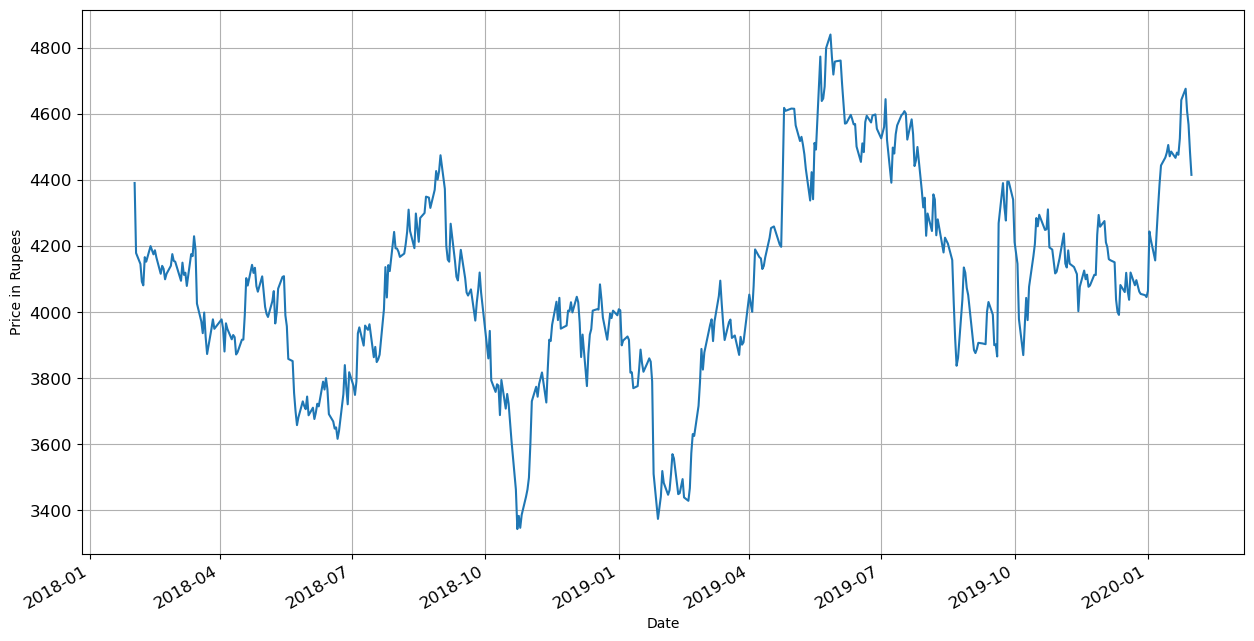

In [7]:
# observe general price variation of the closing price for the give period
stock_df['Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Rupees')
plt.show()

In [8]:
# Create 20 days simple moving average column
stock_df['20_SMA'] = stock_df['Close'].rolling(window = 20, min_periods = 1).mean()

# Create 50 days simple moving average column
stock_df['50_SMA'] = stock_df['Close'].rolling(window = 50, min_periods = 1).mean()

stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA
Date,,,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309,4391.450195,4391.450195
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012,4285.450195,4285.450195
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020,4239.100098,4239.100098
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939,4202.487549,4202.487549
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748,4178.300049,4178.300049


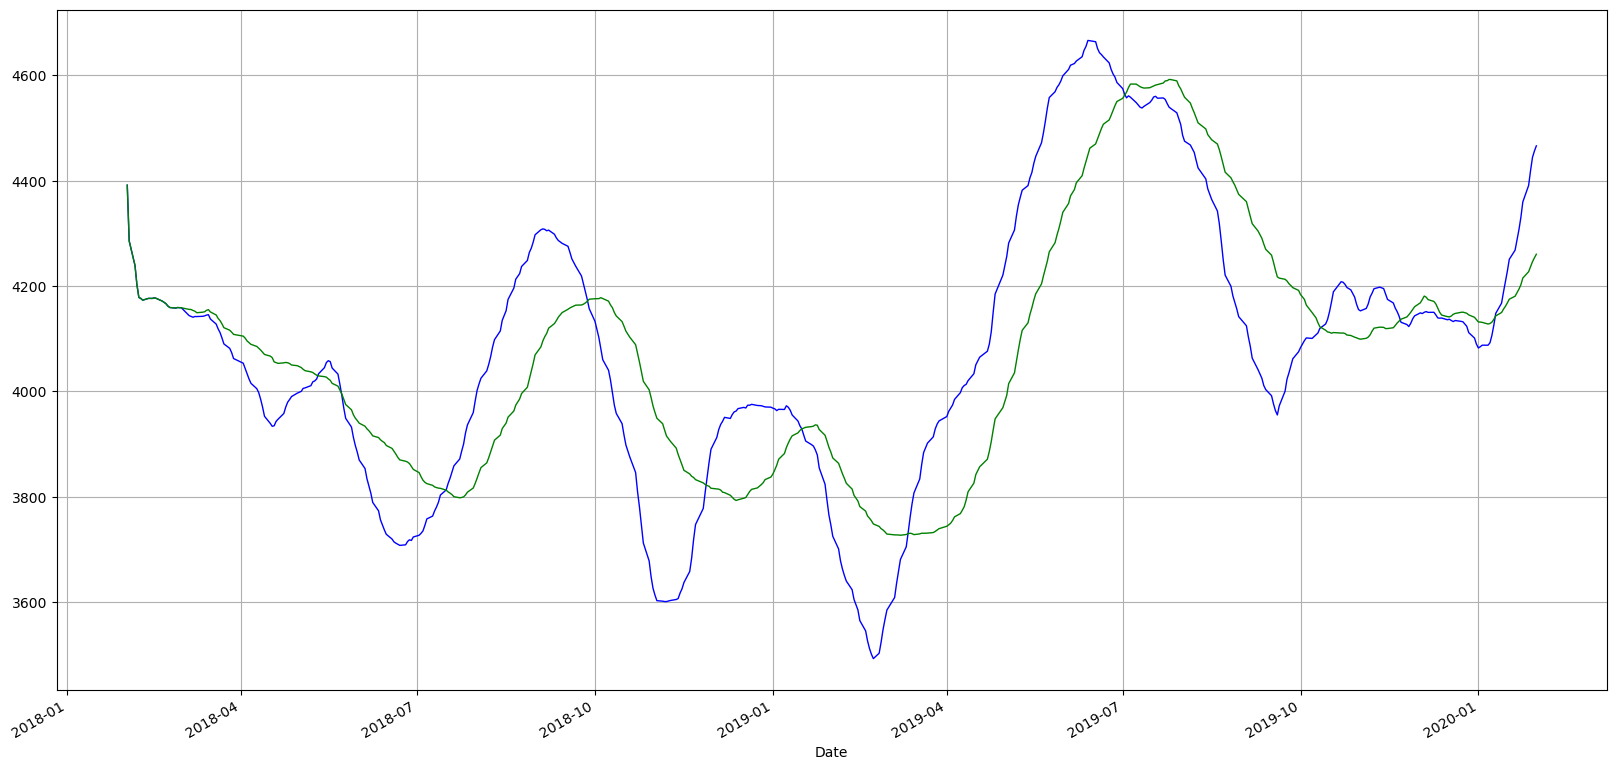

In [9]:
# plot short and long moving averages 

plt.figure(figsize = (20, 10))
#stock_df['Close Price'].plot(color = 'k', lw = 1)
stock_df['20_SMA'].plot(color = 'b', lw = 1)
stock_df['50_SMA'].plot(color = 'g', lw = 1)
plt.grid()
plt.show()

In [10]:
# create a new column 'Signal' such that if 20-day SMA is greater than 50-day SMA then set Signal as 1 else 0.

stock_df['Signal'] = 0.0  
stock_df['Signal'] = np.where(stock_df['20_SMA'] > stock_df['50_SMA'], 1.0, 0.0) 

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
stock_df['Position'] = stock_df['Signal'].diff()

# display the dataframe
stock_df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-06,4191.000000,4199.750000,4131.000000,4157.100098,4081.716797,462841,4087.607520,4127.849023,0.0,0.0
2020-01-07,4199.549805,4254.000000,4164.049805,4242.100098,4165.175781,524372,4092.140015,4128.759023,0.0,0.0
2020-01-08,4224.850098,4332.000000,4183.799805,4318.950195,4240.632324,1032268,4106.155029,4131.340029,0.0,0.0
2020-01-09,4337.000000,4400.000000,4331.600098,4388.000000,4308.430664,698429,4125.497534,4136.746025,0.0,0.0
2020-01-10,4388.100098,4464.049805,4366.899902,4444.600098,4364.003906,735887,4148.122534,4143.184023,1.0,1.0
2020-01-13,4457.549805,4492.000000,4450.049805,4468.700195,4387.666992,403937,4167.427539,4149.694023,1.0,0.0
2020-01-14,4465.000000,4502.950195,4422.700195,4483.299805,4402.002441,438651,4188.530029,4156.105020,1.0,0.0
2020-01-15,4451.049805,4525.250000,4410.000000,4506.500000,4424.781250,416924,4207.877539,4161.461016,1.0,0.0
2020-01-16,4520.000000,4554.899902,4433.250000,4472.350098,4391.250488,467980,4228.225049,4167.960020,1.0,0.0


Note that Postion = 1 indicates a 'buy' call and Postition = -1 indicates 'sell' call

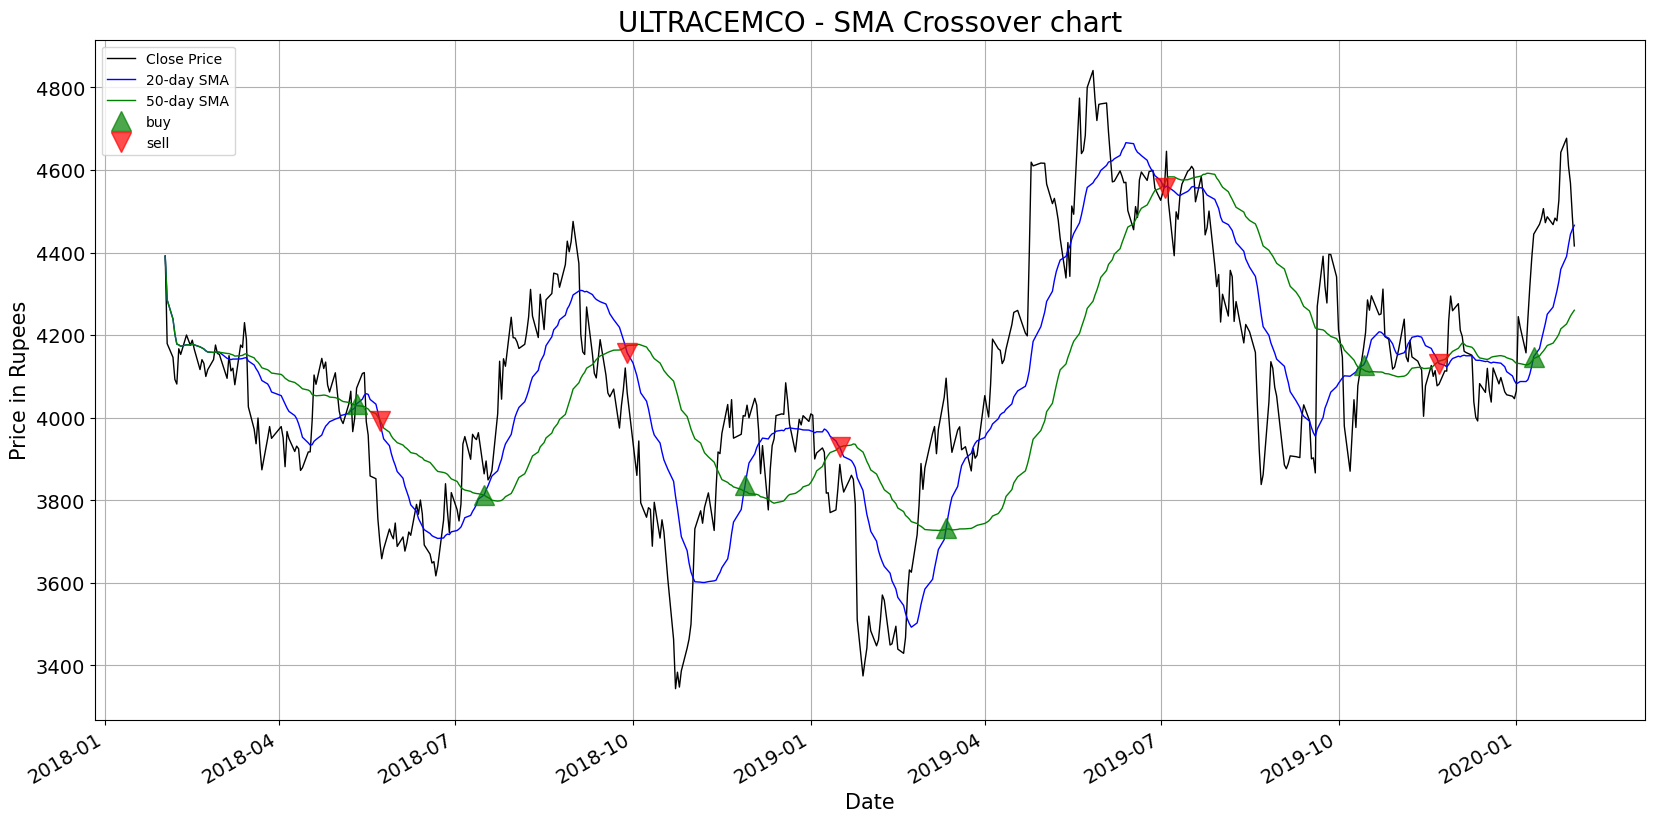

In [11]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages 
stock_df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
stock_df['20_SMA'].plot(color = 'b', lw = 1, label = '20-day SMA') 
stock_df['50_SMA'].plot(color = 'g', lw = 1, label = '50-day SMA') 

# plot 'buy' signals
plt.plot(stock_df[stock_df['Position'] == 1].index, 
         stock_df['20_SMA'][stock_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(stock_df[stock_df['Position'] == -1].index, 
         stock_df['20_SMA'][stock_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - SMA Crossover chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [12]:
from tabulate import tabulate

df_newsma = stock_df[(stock_df['Position'] == 1) | (stock_df['Position'] == -1)]
df_newsma['Position'] = df_newsma['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_newsma, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+---------+-------------+----------+----------+----------+----------+------------+
| Date                |    Open |    High |     Low |   Close |   Adj Close |   Volume |   20_SMA |   50_SMA |   Signal | Position   |
|---------------------+---------+---------+---------+---------+-------------+----------+----------+----------+----------+------------|
| 2018-05-11 00:00:00 | 4011    | 4085    | 3968.55 | 4071.6  |     3976.81 |    97087 |  4033.5  |  4029.3  |        1 | Buy        |
| 2018-05-23 00:00:00 | 3750    | 3750    | 3690.05 | 3700.8  |     3614.64 |   333394 |  3992.47 |  3995.07 |        0 | Sell       |
| 2018-07-16 00:00:00 | 3964    | 3977.55 | 3834.2  | 3864    |     3784.23 |   284241 |  3812.83 |  3812.47 |        1 | Buy        |
| 2018-09-28 00:00:00 | 4151    | 4151.3  | 4014.05 | 4059.95 |     3976.14 |   318703 |  4157.01 |  4174.93 |        0 | Sell       |
| 2018-11-28 00:00:00 | 4005.2  | 4040    | 3982.2  | 4

In [13]:
stock_df.head()                

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309,4391.450195,4391.450195,0.0,NaN
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012,4285.450195,4285.450195,0.0,0.0
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020,4239.100098,4239.100098,0.0,0.0
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939,4202.487549,4202.487549,0.0,0.0
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748,4178.300049,4178.300049,0.0,0.0


## Exponential Moving Average(EMA) Crossover strategy

In [14]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309,4391.450195,4391.450195,0.0,NaN
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012,4285.450195,4285.450195,0.0,0.0
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020,4239.100098,4239.100098,0.0,0.0
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939,4202.487549,4202.487549,0.0,0.0
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748,4178.300049,4178.300049,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-01-27,4624.899902,4754.100098,4622.000000,4676.950195,4592.140625,1058884,4390.882532,4227.105029,1.0,0.0
2020-01-28,4670.000000,4715.799805,4584.500000,4609.049805,4525.471680,711517,4419.032520,4236.759023,1.0,0.0
2020-01-29,4625.000000,4653.500000,4559.500000,4568.200195,4485.362793,595287,4444.192529,4246.120029,1.0,0.0


In [15]:
# Create 20 days exponential moving average column
stock_df['20_EMA'] = stock_df['Close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
stock_df['50_EMA'] = stock_df['Close'].ewm(span = 50, adjust = False).mean()

stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position,20_EMA,50_EMA
Date,,,,,,,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309,4391.450195,4391.450195,0.0,NaN,4391.450195,4391.450195
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012,4285.450195,4285.450195,0.0,0.0,4371.259719,4383.136470
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020,4239.100098,4239.100098,0.0,0.0,4349.844498,4373.852683
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939,4202.487549,4202.487549,0.0,0.0,4325.349775,4362.825123
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748,4178.300049,4178.300049,0.0,0.0,4302.130753,4351.794728


In [16]:
# update column 'Signal' such that if 20-day EMA is greater than 50-day EMA then set Signal as 1 else 0.

stock_df['Signal'] = 0.0  
stock_df['Signal'] = np.where(stock_df['20_EMA'] > stock_df['50_EMA'], 1.0, 0.0) 

# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
stock_df['Position'] = stock_df['Signal'].diff()

# display the dataframe
stock_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position,20_EMA,50_EMA
Date,,,,,,,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309,4391.450195,4391.450195,0.0,NaN,4391.450195,4391.450195
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012,4285.450195,4285.450195,0.0,0.0,4371.259719,4383.136470
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020,4239.100098,4239.100098,0.0,0.0,4349.844498,4373.852683
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939,4202.487549,4202.487549,0.0,0.0,4325.349775,4362.825123
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748,4178.300049,4178.300049,0.0,0.0,4302.130753,4351.794728
2018-02-08,4085.000000,4181.899902,4051.949951,4167.000000,4069.989014,188256,4176.416707,4176.416707,0.0,0.0,4289.261158,4344.547876
2018-02-09,4060.000000,4167.899902,4054.050049,4153.299805,4056.608398,181041,4173.114293,4173.114293,0.0,0.0,4276.312458,4337.047951
2018-02-12,4170.000000,4222.450195,4162.549805,4200.299805,4102.514648,218964,4176.512482,4176.512482,0.0,0.0,4269.073157,4331.685279
2018-02-14,4200.000000,4206.549805,4155.000000,4175.500000,4078.291748,152754,4176.399984,4176.399984,0.0,0.0,4260.161428,4325.560366


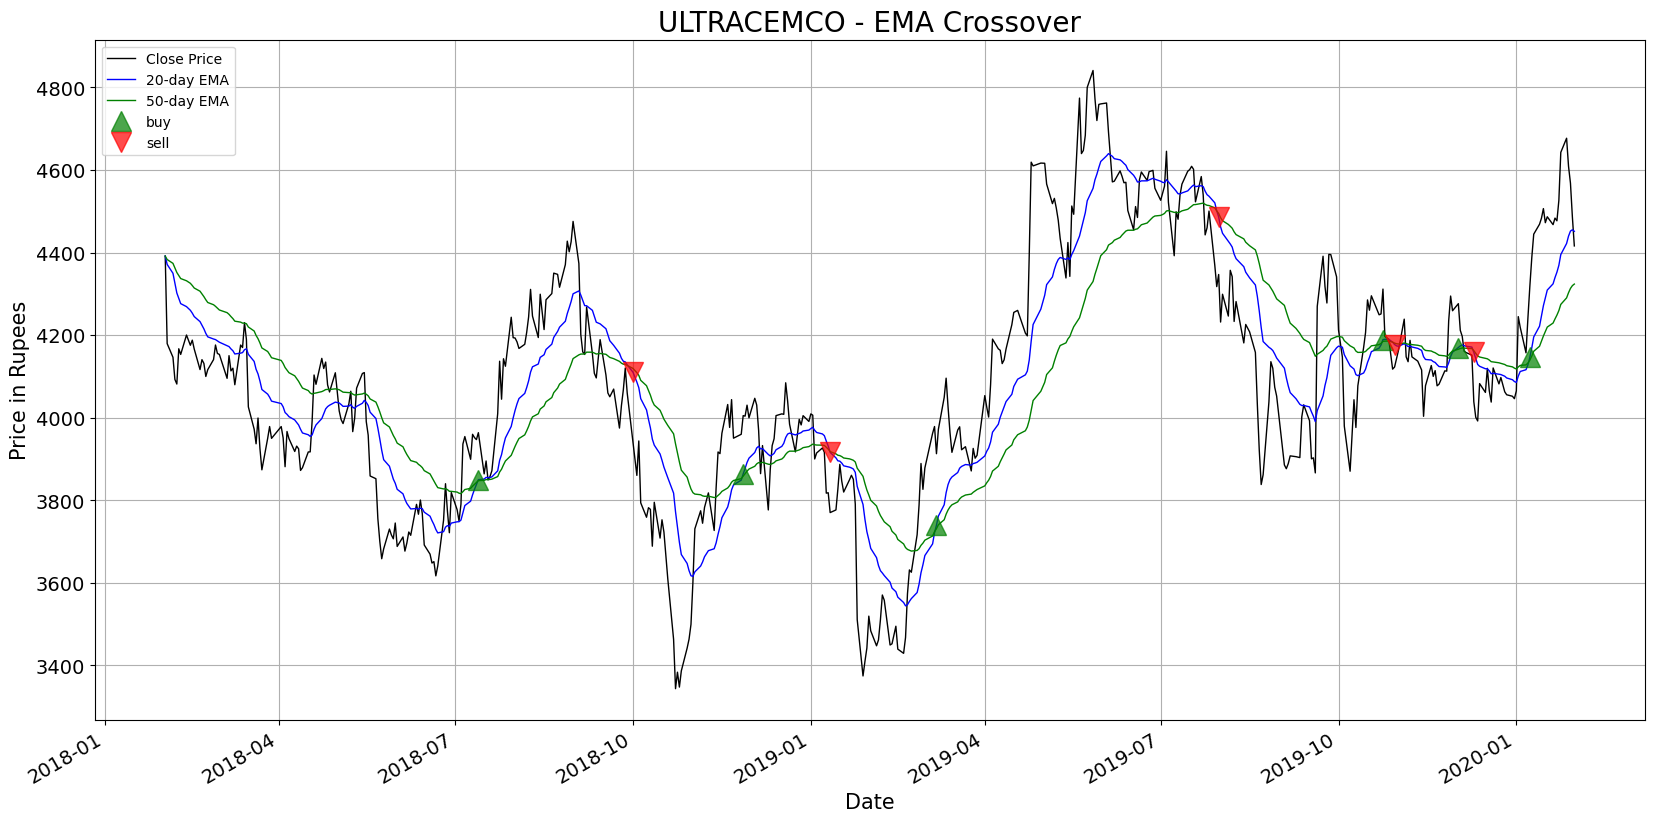

In [17]:
plt.figure(figsize = (20,10))
plt.tick_params(axis = 'both', labelsize = 14)
# plot close price, short-term and long-term moving averages 
stock_df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
stock_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
stock_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA') 

# plot 'buy' signals
plt.plot(stock_df[stock_df['Position'] == 1].index, 
         stock_df['20_EMA'][stock_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(stock_df[stock_df['Position'] == -1].index, 
         stock_df['20_EMA'][stock_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend();
plt.grid()
plt.show()

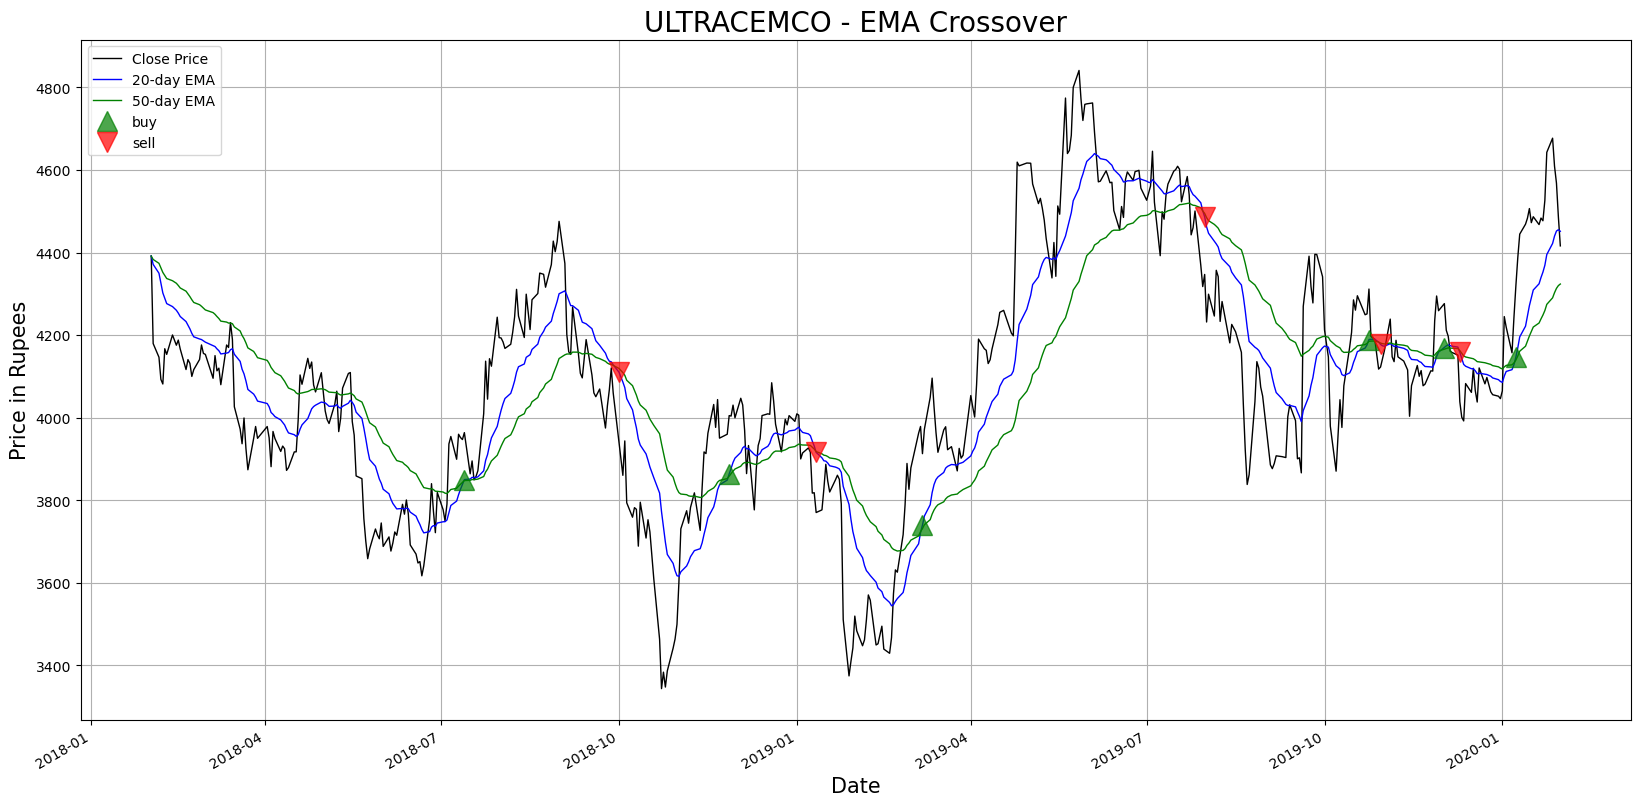

In [18]:
# Create 20 days exponential moving average column
stock_df['20_EMA'] = stock_df['Close'].ewm(span = 20, adjust = False).mean()

# Create 50 days exponential moving average column
stock_df['50_EMA'] = stock_df['Close'].ewm(span = 50, adjust = False).mean()

# create a new column 'Signal' such that if 20-day EMA is greater than 50-day SMA then set Signal as 1 else 0.
stock_df['Signal'] = 0.0  
stock_df['Signal'] = np.where(stock_df['20_EMA'] > stock_df['50_EMA'], 1.0, 0.0)
        
# create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
stock_df['Position'] = stock_df['Signal'].diff()

plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
stock_df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
stock_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
stock_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA') 

# plot 'buy' signals
plt.plot(stock_df[stock_df['Position'] == 1].index, 
         stock_df['20_EMA'][stock_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(stock_df[stock_df['Position'] == -1].index, 
         stock_df['20_EMA'][stock_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [19]:
stock_df

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position,20_EMA,50_EMA
Date,,,,,,,,,,,,
2018-02-01,4382.000000,4425.000000,4347.649902,4391.450195,4289.214355,268309,4391.450195,4391.450195,0.0,NaN,4391.450195,4391.450195
2018-02-02,4368.000000,4368.000000,4129.000000,4179.450195,4082.149414,240012,4285.450195,4285.450195,0.0,0.0,4371.259719,4383.136470
2018-02-05,4122.850098,4179.799805,4052.050049,4146.399902,4049.868896,178020,4239.100098,4239.100098,0.0,0.0,4349.844498,4373.852683
2018-02-06,3980.000000,4114.750000,3948.600098,4092.649902,3997.370117,298939,4202.487549,4202.487549,0.0,0.0,4325.349775,4362.825123
2018-02-07,4157.899902,4167.850098,4051.000000,4081.550049,3986.529053,262748,4178.300049,4178.300049,0.0,0.0,4302.130753,4351.794728
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,4624.899902,4754.100098,4622.000000,4676.950195,4592.140625,1058884,4390.882532,4227.105029,1.0,0.0,4421.977531,4290.243845
2020-01-28,4670.000000,4715.799805,4584.500000,4609.049805,4525.471680,711517,4419.032520,4236.759023,1.0,0.0,4439.793938,4302.746040
2020-01-29,4625.000000,4653.500000,4559.500000,4568.200195,4485.362793,595287,4444.192529,4246.120029,1.0,0.0,4452.023105,4313.156007


In [20]:
from tabulate import tabulate

df_new = stock_df[(stock_df['Position'] == 1) | (stock_df['Position'] == -1)]
df_new['Position'] = df_new['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_new, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+---------+-------------+----------+----------+----------+----------+------------+----------+----------+
| Date                |    Open |    High |     Low |   Close |   Adj Close |   Volume |   20_SMA |   50_SMA |   Signal | Position   |   20_EMA |   50_EMA |
|---------------------+---------+---------+---------+---------+-------------+----------+----------+----------+----------+------------+----------+----------|
| 2018-07-13 00:00:00 | 3981.7  | 4024.25 | 3950    | 3963.75 |     3881.92 |   237239 |  3803.1  |  3815.86 |        1 | Buy        |  3849.95 |  3847.65 |
| 2018-10-01 00:00:00 | 4050    | 4050    | 3854    | 3940.2  |     3858.86 |   427828 |  4132.7  |  4175.83 |        0 | Sell       |  4110.15 |  4119.27 |
| 2018-11-27 00:00:00 | 3982    | 4029    | 3950.25 | 4005    |     3922.32 |   290501 |  3808.66 |  3823.21 |        1 | Buy        |  3863.69 |  3858.31 |
| 2019-01-11 00:00:00 | 3818.2  | 3851.55 | 3751.1  | 3770

In [21]:
df_new.head(20)

,Open,High,Low,Close,Adj Close,Volume,20_SMA,50_SMA,Signal,Position,20_EMA,50_EMA
Date,,,,,,,,,,,,
2018-07-13,3981.699951,4024.250000,3950.000000,3963.750000,3881.924561,237239,3803.100012,3815.860996,1.0,Buy,3849.950916,3847.645429
2018-10-01,4050.000000,4050.000000,3854.000000,3940.199951,3858.860840,427828,4132.697510,4175.830005,0.0,Sell,4110.145810,4119.271097
2018-11-27,3982.000000,4029.000000,3950.250000,4005.000000,3922.323242,290501,3808.659985,3823.206987,1.0,Buy,3863.691268,3858.308588
2019-01-11,3818.199951,3851.550049,3751.100098,3770.199951,3692.369873,248857,3955.097510,3915.591997,0.0,Sell,3915.958820,3917.933585
2019-03-07,3978.800049,3987.800049,3900.350098,3912.800049,3832.026367,382836,3657.735022,3727.324004,1.0,Buy,3739.641811,3731.314050
2019-07-31,4296.899902,4362.049805,4211.000000,4346.899902,4268.075684,688261,4506.805054,4574.409023,0.0,Sell,4486.504276,4494.764977
2019-10-24,4265.000000,4330.000000,4243.750000,4311.549805,4233.366211,884456,4203.212451,4109.834971,1.0,Buy,4189.251575,4185.086426
2019-10-30,4170.000000,4206.950195,4101.250000,4122.700195,4047.941406,616338,4165.227466,4101.626982,0.0,Sell,4177.316807,4180.675643
2019-12-02,4270.000000,4320.000000,4255.000000,4276.250000,4198.706543,467324,4148.989990,4168.134990,1.0,Buy,4169.906902,4165.895033
